<a href="https://colab.research.google.com/github/el-grudge/Dostoevsky_NLP/blob/master/Dostoevsky_NLP_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview

NLP applications are everywhere, sometimes we interact directly with them, for example when using an online-translators or for text-completion, other times they work in the background, such as spam detection. As a field of study, Natural Language Processing (NLP) lies at the intersection between linguistics and data science. Linguistics provide the foundational base of language, the grammar rules and patterns that dictate the use of a language, while data science provides the tools and techniques needed to explore large corpuses in order to extract insights from them. These insights can help enrich our understanding of language, its use, and how it reflects on the human condition, what is known as Culturomic analysis. For example, the 2013 paper by Acerbi et al. [1] explored the expression of emotions throughout the 20th century using sentiment analysis. Another application of NLP is to make predictions, for example, in 2011 researchers from Indiana University and the University of Manchester were able to make predictions regarding the DJIA closing values using public mood states extracted from Twitter text [2]. Other areas of NLP research, such as text generation and composition, have also seen major advances, and today we are seeing AI systems that are able to generate song lyrics [3] as well as compose short stories [4].

In this report, I will use NLP to analyze four novels by the Russian author Fyodor Dostoevsky that span the entirety of his career. Specifically, I will apply topic modelling in order to extract the main themes and motifs in each of these works, and see if there are any recurrent ideas. I will also use sentiment analysis to capture the stories' progression, in order to create visual plots that describe the overall arc of the story. My goal here is to gain better understanding of these works by exploring the tropes the author used and the themes he explored. The results show that the author was concerned with topics relating to religion, philosophy, and human psychology. The results also shed some light on his development, showing how his own personal experiences might have impacted him as a writer. Such analysis can provide valuable insights that can be applied for predictive tasks as well (although that is out of the scope of this particular study). For example, the identified topics and sentiment progression can be used as features for recommender systems, something explored by Bhowmick et al [5].

## Data and Process

### Data Source

I used data from the Gutenberg project [6], a large online repository for e-books. The text data of these books is accessible through the gutenbergr R package [7], developed and maintained by rOpenSci. The package provides several functions to navigate the data, and the gutenberg_download() function to download the text data (you will need the text ID in order to download any specific book).

Below, I provide a small plot summary for the four novels I will be analyzing:  

**Poor Folk, 1845 [8]**: This was Dostoevsky's first published work. It tells the story of two relatives, Varvara Dobroselova and Makar Devushkin, through the letters they exchanged over the span of a 5 months period. The letters describe their living conditions, which are extremely tough as a result of their poverty. They also talk about their lives and interests, and they discuss different books which they exchange with one another. Makar starts developing feelings for Varvara, and acts on these feelings by sending Varvara gifts and money to help her. At work, his boss takes pity on him and lends a sum of money. Makar starts thinking about living with Varvara, however, she informs her that she has met a wealthy man whom she is going to marry. The story ends with Makar sending several letters that go unanswered.

**Notes from the Underground, 1864 [9]**: The novel is divided into two parts. In part one, the protagonist (who remains unnamed throughout the story) is talking directly to the reader, explaining his ideas about the meaning of 'suffering' and his internal struggles between reason and will. In part two, the narrator tells a story that took place several years back. It describes a dinner party he goes to, where he and several of his acquaintances are gathered to send off one of their school colleagues. We see how his dignity suffers from the apparent discrepancy between his living conditions and that of his friends. Later on, he goes to a brothel where he meets a young prostitute. He challenges her world view, and she appears to accept the fallacies of her ideas. The next day, she pays him a visit at his house, but, due to his capricious nature, instead of welcoming her, he admonishes her, and she eventually leaves.

**Crime and Punishment, 1866 [10]**: Rodion Raskolnikov is a young law student who lives in absolute squalor. His conditions are so tough that he can no longer pay his school fees. For a while he has been contemplating the idea of killing an old pawn broker lady and stealing her money. In his mind, he sees the this act not as a heinous crime, since the old lady is not loved by anyone, but as a means to set himself on a path to fulfill his potential, and eventually help humanity. At last he does commit the murder, but is confronted by pangs of guilt that torment him. Eventually, he turns himself to the police and accepts his fate.

**The Brothers Karamazov, 1880 [11]**: This novel tells the story of the Karamazov family. The story starts with an ongoing feud between the father, Fyodor, and the eldest son, Dmitri, over the son's inheritence. The two younger brothers, Ivan (middle), a brilliant intellectual, and Alexei (youngest), who is a novice at an Orthodox monastry, try to reconciliate between them. Soon afterwards, we learn about a love triangle involving Fyodor, Dmitri, and a local beauty, which adds further strain to the already trouble relationship between father and son. While Alexei earnstly tries to resolve the problems within his family, Ivan is more aloof, and does not really try reconcile between his father and his older brother. Alexei and Ivan represent two opposing ideologies, one symblizes Christian love, while the other rejects religion, and is more inclined to rationalism and even nihilism. A fourth brother, although one who is of illegitimate birth, is influcend by Ivan's ideas and kills the father. Dmitri is convicted for the murder, based on their well documented feud. Ivan learns the truth, and is tormented by guilt, and even announces in the courtroom that he is the one responsible for father's murder, but one takes him at his word. The story ends with the two younger brothers devising an escape plan for their older brother.

## Process

### I- Load the libraries

In [91]:
# prerequisite for installing topicmodels
system("apt install libgsl-dev", intern=TRUE)

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "libgsl-dev is already the newest version (2.4+dfsg-6)."         
[5] "0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded."

In [2]:
install.packages("gutenbergr")
install.packages("tidytext")
install.packages("widyr")
install.packages("textdata")
install.packages("syuzhet")
install.packages("ggrepel")
install.packages("gridExtra")
install.packages("kableExtra")
install.packages("formattable")
install.packages("circlize")
install.packages("yarrr")
install.packages("radarchart")
install.packages("igraph")
install.packages("ggraph")
install.packages("formattable")
install.packages("wordcloud2")
install.packages("topicmodels")
install.packages("tm")
install.packages("plotly")
install.packages("cleanNLP")
install.packages('qdapDictionaries')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘urltools’, ‘lazyeval’




In [ ]:
#install.packages("memery
#install.packages("magick")
#library(memery) #Memes - images with plots
#library(magick) #Memes - images with plots (image_read)

In [22]:
options(scipen=999)

# 1. Load the libraries
library(gutenbergr) # DATA SOURCE
library(dplyr) # Data manipulation (also included in the tidyverse package)
library(tidytext) #  #text mining, unnesting
library(tidyr) # Spread, separate, unite, text mining (also included in the tidyverse package)  #gather()
library(widyr) # Use for pairwise correlation
library(syuzhet) # plot story arcs
library(textdata) # ??

# Visualizations!
library(ggplot2) #Visualizations (also included in the tidyverse package)
library(ggrepel) #`geom_label_repel`  #text and label geoms for ggplot2
library(gridExtra) #`grid.arrange()` for multi-graphs
library(knitr) #Create nicely formatted output tables  # for dynamic reporting
library(kableExtra) #Create nicely formatted output tables
library(formattable) #For the color_tile function  #color tile and color bar in `kables`
library(circlize) #Visualizations - chord diagram
library(yarrr)  #Pirate plot
library(radarchart) #Visualizations
library(igraph) #ngram network diagrams
library(ggraph) #ngram network diagrams
library(grid) #to manipulate grid text
library(formattable) # for the color_tile function
library(wordcloud2) #creative visualizations

# Libraries and Functions
library(topicmodels) #the LDA algorithm
library(qdapDictionaries) #stopwords
library(tm) #text mining
library(plotly) #interactive ggplot graphs
library(cleanNLP)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


circlize version 0.4.13
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


Loading required package: jpeg

Loading required package: BayesFactor

Loading required package: coda

Loading required package: Matrix


Attaching package: ‘Matrix’



### II- Utility Functions

First, I define a number of utility functions that I will be using throughout the analysis. These include:  

1- `basic.cleaning`: Sets all text to lower case and handles contractions  
2- `remove.stopwords`: Removes stopwords  
3- `remove.names`: Removes characters names - the names of the characters often occur a lot throughout text, so they dominate any analysis applied to the text, therefore it is better to remove them  
4- `remove.punctuation`: Removes punctuation  
5- `remove.numbers`: Removes numbers  
6- `remove.symbols`: Removes symbols  
7- `removeSpecialChars`: Removes special characters  
8- `remove.space`: Removes extra space

In [24]:
# Basic cleaning
basic.cleaning <- function(doc) {
  # to lower case
  doc <- stringr::str_to_lower(doc)
  
  # "won't" is a special case as it does not expand to "wo not"
  doc <- gsub("won't", "will not", doc)
  doc <- gsub("can't", "can not", doc)
  doc <- gsub("n't", " not", doc)
  doc <- gsub("'ll", " will", doc)
  doc <- gsub("'re", " are", doc)
  doc <- gsub("'ve", " have", doc)
  doc <- gsub("'m", " am", doc)
  doc <- gsub("'d", " would", doc)
  # 's could be 'is' or could be possessive: it has no expansion
  doc <- gsub("'s", "", doc)
  
  return(doc)
}

In [25]:
# remove stop words
remove.stopwords <- function(doc){
  doc <- tm::removeWords(
    x = doc, 
    words = tm::stopwords(kind='SMART')
  )
  doc <- tm::removeWords(
    x = doc, 
    words = qdapDictionaries::Top200Words
  )
  return(doc)
}

In [26]:
# remove names
remove.names <- function(doc){
  doc <- tm::removeWords(
    x = doc, 
    words = dostoevsky_names
  )
  return(doc)
}

In [27]:
# remove punctuation
remove.punctuation <- function(doc) {
  doc <- stringr::str_replace_all(
    string = doc,
    pattern = "[:punct:]",
    replacement = " "
  )
  return(doc)
}

In [28]:
# remove numbers
remove.numbers <- function(doc) {
  doc <- stringr::str_replace_all(
    string = doc,
    pattern = "[:digit:]",
    replacement = " "
  )
  return(doc)
}

In [29]:
# replace symbols
remove.symbols <- function(doc){
  doc <- stringr::str_replace_all(
    string = doc,
    pattern = "\\W",
    replacement = " "
  )
  return(doc)
}

In [30]:
# function to remove special characters
removeSpecialChars <- function(x) gsub("[^a-zA-Z0-9 ]", " ", x)

In [31]:
# remove redundant, unnecessary white space
remove.space <- function(doc){
  doc <- trimws(stringr::str_replace_all(
    string = doc,
    pattern = "\\s+",
    replacement = " "
  ))
  return(doc)
}

Next, I define some plotting utilities:  

1- `my_colors`: A list of colors that will be used throughtout the project  
2- `theme_dostoevsky`: A function that defines theme components  
3- `word_chart`: A function that generates a table-like plot. I will use this function to show top words per topic for the LDA analysis

In [34]:
# plotting utilities (color scheme and theme)
my_colors <- c(
  "Poor Folk"="deepskyblue3", 
  "Notes from the Underground" = "darkred", 
  "Crime and Punishment" = "goldenrod", 
  "The Brothers Karamazov" = "darkgreen"
)

In [32]:
theme_dostoevsky <- function() 
{
  theme_bw() +
    theme(plot.title = element_text(hjust = 0.5),
          axis.text.x = element_blank(), 
          axis.ticks = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.position = "none")
}

In [33]:
word_chart <- function(data, input, title) {
  data %>%
    #set y = 1 to just plot one variable and use word as the label
    ggplot(aes(as.factor(row), 1, label = input, fill = factor(topic) )) +
    #you want the words, not the points
    geom_point(color = "transparent") +
    #make sure the labels don't overlap
    geom_label_repel(nudge_x = .2,  
                     direction = "y",
                     box.padding = 0.1,
                     segment.color = "transparent",
                     size = 4,
                     color='black') +
    facet_grid(~topic) +
    theme_dostoevsky() +
    theme(axis.text.y = element_blank(), axis.text.x = element_blank(),
          panel.grid = element_blank(), panel.background = element_blank(),
          panel.border = element_rect("lightgray", fill = NA),
          strip.text.x = element_text(size = 9)) +
    labs(x = NULL, y = NULL, title = title) +
    scale_fill_manual(values=c("dodgerblue", "firebrick1", "yellow", "limegreen")) +
    coord_flip()
}

### III- Data Loading

As mentioned before, I use the `gutenberg_download` function to download the raw texts. Three of the 4 texts are divided into parts, where each part is split into a number of chapters. I use the `stringi::stri_split_regex` function to split the text into parts and chapters. I also add some metadata to each text, such as the year the book was published and the book's title name. The data.frame object dostoevsky combines all the texts together.

The dataframe dostoevsky_M the text is further split on the sentence level. I use the function `get_sentences` from the syuzhet package to split the text into sentences. A quick word about he syuzhet function:

Developed by Matthew Jockers [12, 13], the package provides a number utilities to split text and calculate the sentiment value (it uses a lexicon to do so; you can pick one of four available lexicons, syuzhet, bing, afinn, and nrc). The package also provides the `get_dct_transform` function, which calculates a rolling value discretizes the input into a standardized output to make it easy to plot sentiment and compare different plots.

Next, I clean the text using the `basic.cleaning` function. This is followed by POS annotation using cleanNLP's `cnlp_init_udpipe` and `cnlp_annotate`. This steps achieves two things:

1- It tokenizes the sentences into words  
2- It lemmatizes each word, making it possible to dispense with the stem-complete step

An important thing to note here, some words become stopwords when lemmatized, so it is important to clean the output of the cnlp_annotate() function. The data.frame object dostoevsky_Words holds the words and lemmas of the entire corpus.

In [35]:
# 3. Data Loading
# 2302 Poor Folk
pf <- toString(gutenberg_download(2302)$text)
pf_Parts <- data.frame(text=stringi::stri_split_regex(pf,", , PART [A-Z]*, ,")[[1]])
pf_Parts$part <- nrow(pf_Parts)
pf_M <- data.frame()
for (part in pf_Parts$part){
  chapters <- data.frame(stringi::stri_split_regex(pf_Parts[pf_Parts$part==part,'text'],", , , , , "))
  colnames(chapters) <- 'text'
  chapters$chapter <- c(0:(nrow(chapters)-1))
  chapters$part <- part
  chapters$title <- 'Poor Folk'
  chapters$year <- 1845
  pf_M <- rbind(pf_M, chapters)
}
pf_M <- pf_M[pf_M$chapter!=0,]
pf_M$text <- as.character(pf_M$text)

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest

Using mirror http://aleph.gutenberg.org



In [36]:
# 600 Notes from the Underground
nftu <- toString(gutenberg_download(600)$text)
nftu_Parts <- data.frame(text=stringi::stri_split_regex(nftu,", , PART [A-Z]*, ,")[[1]])
nftu_Parts$part <- c(0:(nrow(nftu_Parts)-1))
nftu_Parts <- nftu_Parts[nftu_Parts$part!=0,]
nftu_M <- data.frame()
for (part in nftu_Parts$part){
  chapters <- data.frame(stringi::stri_split_regex(nftu_Parts[nftu_Parts$part==part,'text'],", , [IVX]*, , "))
  colnames(chapters) <- 'text'
  chapters$chapter <- c(0:(nrow(chapters)-1))
  chapters$part <- part
  chapters$title <- 'Notes from the Underground'
  chapters$year <- 1864
  nftu_M <- rbind(nftu_M, chapters)
}
nftu_M <- nftu_M[nftu_M$chapter!=0,]
nftu_M$text <- as.character(nftu_M$text)

In [37]:
# 2554 Crime and Punishment
cap <- toString(gutenberg_download(2554)$text)
cap_Parts <- data.frame(text=stringi::stri_split_regex(cap,", , PART [A-Z]*, ,|EPILOGUE")[[1]])
cap_Parts$part <- c(0:(nrow(cap_Parts)-1))
cap_Parts <- cap_Parts[cap_Parts$part!=0,]
cap_M <- data.frame()
for (part in cap_Parts$part){
  chapters <- data.frame(stringi::stri_split_regex(cap_Parts[cap_Parts$part==part,'text'],", , , , CHAPTER [A-Z]*, ,|, , , , [A-Z]*, , "))
  colnames(chapters) <- 'text'
  chapters$chapter <- c(1:nrow(chapters))
  chapters$part <- part
  chapters$title <- 'Crime and Punishment'
  chapters$year <- 1866
  cap_M <- rbind(cap_M, chapters)
}
cap_M$text <- as.character(cap_M$text)

In [38]:
# 28054 The Brothers Karamazov
brothers <- toString(gutenberg_download(28054)$text)
brothers_Parts <- data.frame(text=stringi::stri_split_regex(brothers,", , Book [A-Z. A-Za-z ]*|, , EPILOGUE")[[1]])
brothers_Parts$part <- c(0:(nrow(brothers_Parts)-1))
brothers_Parts <- brothers_Parts[brothers_Parts$part!=0,]
brothers_M <- data.frame()
for (part in brothers_Parts$part){
  chapters <- data.frame(stringi::stri_split_regex(brothers_Parts[brothers_Parts$part==part,'text'],", , , , Chapter [A-Z. A-Za-z' ]*")[[1]][-1])
  colnames(chapters) <- 'text'
  chapters$chapter <- c(1:nrow(chapters))
  chapters$part <- part
  chapters$title <- 'The Brothers Karamazov'
  chapters$year <- 1880
  brothers_M <- rbind(brothers_M, chapters)
}
brothers_M$text <- as.character(brothers_M$text)

In [39]:
# dostoevsky_M
dostoevsky <- rbind(pf_M, nftu_M, cap_M, brothers_M)
dostoevsky_M <- data.frame()
for (title in unique(dostoevsky$title)){
  df <- data.frame()
  for (part in unique(dostoevsky[dostoevsky$title==title,'part'])){
    for (chapter in dostoevsky[dostoevsky$title==title & dostoevsky$part==part,'chapter']){
      year = unique(dostoevsky[dostoevsky$title==title & dostoevsky$part==part & dostoevsky$chapter==chapter,'year'])
      text = get_sentences(dostoevsky[dostoevsky$title==title & dostoevsky$part==part & dostoevsky$chapter==chapter,'text'])
      # dostoevsky_M <- rbind(dostoevsky_M, data.frame(text, part, chapter, title, year))
      df <- rbind(df, data.frame(text, part, chapter, title, year))
    }
  }
  df$n <- seq(1:nrow(df))
  dostoevsky_M <- rbind(dostoevsky_M, df)
}

In [40]:
dostoevsky_M$text <- as.character(dostoevsky_M$text)
dostoevsky_M$sentiment <- get_sentiment(dostoevsky_M$text)
dostoevsky_M$segment <- paste(dostoevsky_M$part, dostoevsky_M$chapter, sep=".")
dostoevsky_M$doc_id <- c(1:nrow(dostoevsky_M))

In [41]:
# pos tagging
cnlp_init_udpipe(model_name = "english")

dostoevsky_annotated <- cnlp_annotate(
  input=dostoevsky_M,
  verbose=10,
  text_name="text",
  doc_name="doc_id"
)

dostoevsky_Words <- dostoevsky_annotated$token[,c('doc_id','token','lemma')] %>% 
  right_join(dostoevsky_annotated$document, by=c('doc_id'))
dostoevsky_Words <- data.frame(dostoevsky_Words)
colnames(dostoevsky_Words)[2] <- 'word'


 - This model has been trained on version 2.5 of data from https://universaldependencies.org

 - The model is distributed under the CC-BY-SA-NC license: https://creativecommons.org/licenses/by-nc-sa/4.0

 - Visit https://github.com/jwijffels/udpipe.models.ud.2.5 for model license details.

 - For a list of all models and their licenses (most models you can download with this package have either a CC-BY-SA or a CC-BY-SA-NC license) read the documentation at ?udpipe_download_model. For building your own models: visit the documentation by typing vignette('udpipe-train', package = 'udpipe')




Processed document 10 of 34416
Processed document 20 of 34416
Processed document 30 of 34416
Processed document 40 of 34416
Processed document 50 of 34416
Processed document 60 of 34416
Processed document 70 of 34416
Processed document 80 of 34416
Processed document 90 of 34416
Processed document 100 of 34416
Processed document 110 of 34416
Processed document 120 of 34416
Processed document 130 of 34416
Processed document 140 of 34416
Processed document 150 of 34416
Processed document 160 of 34416
Processed document 170 of 34416
Processed document 180 of 34416
Processed document 190 of 34416
Processed document 200 of 34416
Processed document 210 of 34416
Processed document 220 of 34416
Processed document 230 of 34416
Processed document 240 of 34416
Processed document 250 of 34416
Processed document 260 of 34416
Processed document 270 of 34416
Processed document 280 of 34416
Processed document 290 of 34416
Processed document 300 of 34416
Processed document 310 of 34416
Processed documen

In [47]:
# to lower
dostoevsky_Words$word <- stringr::str_to_lower(dostoevsky_Words$word)
dostoevsky_Words$lemma <- stringr::str_to_lower(dostoevsky_Words$lemma)

In [48]:
# cleaning
dostoevsky_Words$word <- sapply(dostoevsky_Words$word, removeSpecialChars)
dostoevsky_Words$lemma <- sapply(dostoevsky_Words$lemma, removeSpecialChars)
dostoevsky_Words$word <- sapply(dostoevsky_Words$word, remove.space)
dostoevsky_Words$lemma <- sapply(dostoevsky_Words$lemma, remove.space)

In [54]:
# remove stopwords
dostoevsky_Words <- dostoevsky_Words[!dostoevsky_Words$word %in% tm::stopwords(kind='SMART'),]
dostoevsky_Words <- dostoevsky_Words[!dostoevsky_Words$word %in% qdapDictionaries::Top200Words,]

dostoevsky_Words <- dostoevsky_Words[!dostoevsky_Words$lemma %in% tm::stopwords(kind='SMART'),]
dostoevsky_Words <- dostoevsky_Words[!dostoevsky_Words$lemma %in% qdapDictionaries::Top200Words,]

In [57]:
# remove names
pf_names <- c('makar', 'alexievitch', 'dievushkin',
              'barbara', 'dobroselova', 'alexievna',
              'hospodin', 'bwikov',
              'anna', 'thedorovna',
              'pokrovski', 'petinka',
              'rataziaev', 
              'thedora',
              'gorshkov',
              'emelia', 'ilyitch',
              'sasha',
              'tchinovnik',
              'theresa',
              'samson', 'virin',
              'evstafi', 'ivanovitch',
              'phaldoni',
              'markov')

nftu_names <- c('liza', 'simonov', 'zverkov', 'trudolyubov', 'apollon', 'ferfitchkin', 'anton', 'antonitch')

cap_names <- c('rodion', 'romanovitch', 'raskolnikov', 'rodya',
               'sofya', 'semyonovna', 'marmeladov', 'sonia',
               'avdotya', 'romanovna', 'dounia',
               'arkady', 'ivanovitch', 'svidrigailov',
               'dmitri', 'prokofitch', 'razumihin',
               'katerina', 'ivanovna',
               'porfiry', 'petrovitch',
               'semyon', 'zaharovitch',
               'pulcheria', 'alexandrovna',
               'pyotr', 'luzhin',
               'andrey', 'semyonovitch', 'lebeziatnikov',
               'alyona',
               'lizaveta',
               'zossimov',
               'praskovya', 'pavlovna', 'pashenka',
               'nastasya', 'petrovna',
               'ilya',
               'alexandr', 'grigorievitch', 'zametov',
               'nikolay', 'dementyev', 'mikolka',
               'polenka',
               'amalia',
               'marfa',
               'lida',
               'nikodim',
               'koch')

brothers_names <- c('alexey', 'fyodorovitch', 'karamazov', 'alyosha',
                    'anna', 'fyodorovna', 'madame', 'krassotkin',
                    'dmitri', 'mitya',
                    'fenya',
                    'ferapont',
                    'fetyukovitch',
                    'fyodor', 'pavlovitch',
                    'grigory', 'vassilyevitch',
                    'ilusha',
                    'ilyitch', 'perhotin',
                    'ippolit', 'kirillovitch',
                    'ivan', 'vanya',
                    'katerina', 'ivanovna', 'katya',
                    'kuzma', 'kuzmitch', 'samsonov',
                    'lise',
                    'lizaveta', 'smerdyastchaya',
                    'hohlakov',
                    'mihail', 'osipovitch', 'rakitin',
                    'nikolay', 'ivanovitch', 'kolya',
                    'pavel', 'smerdyakov',
                    'pyotr', 'alexandrovitch', 'miuesov',
                    'snegiryov',
                    'zossima',
                    'agrafena', 'alexandrovna', 'svyetlov', 'grushenka', 'grusha',
                    'adelaida',
                    'andrey',
                    'fomitch', 'kalganov',
                    'paissy',
                    'gorstkin', 'lyagavy',
                    'herzenstube',
                    'makarovitch', 'makarov',
                    'marfa', 'ignatyevna',
                    'marya', 'kondratyevna',
                    'maximov',
                    'mussyalovitch',
                    'pan', 'vrublevsky',
                    'sofya',
                    'trifon', 'borissovitch',
                    'varvinsky',
                    'parfenovitch', 'nelyudov',
                    'yefim', 'petrovitch', 'polenov',
                    'von', 'sohn',
                    'richard',
                    'perezvon',
                    'smurov',
                    'zhutchka',
                    'nina',
                    'iosif')

dostoevsky_names <- c(pf_names, nftu_names, cap_names, brothers_names)

dostoevsky_Words <- dostoevsky_Words[!dostoevsky_Words$word %in% dostoevsky_names,]
dostoevsky_Words <- dostoevsky_Words[!dostoevsky_Words$lemma %in% dostoevsky_names,]
dim(dostoevsky_Words) # [1] 376676      9

[1] 373803     10

In [59]:
# remove NA
dostoevsky_Words <- dostoevsky_Words[nzchar(dostoevsky_Words$word),]
dostoevsky_Words <- dostoevsky_Words[nzchar(dostoevsky_Words$lemma),]
dim(dostoevsky_Words) # [1] 175779      9

[1] 176339     10

In [60]:
# NRC sentiments
dostoevsky_nrc <- data.frame()
for (title in unique(dostoevsky_M$title)){
  nrc_df <- get_nrc_sentiment(dostoevsky_M[dostoevsky_M$title==title,'text'])
  dwc <- round(nrow(nrc_df)*.1)
  nrc_rolled <- zoo::rollmean(nrc_df, k=dwc)
  nrc_rolled <- data.frame(nrc_rolled) %>% select(-negative, -positive)
  for (column in colnames(nrc_rolled)){
    nrc_list <- rescale_x_2(nrc_rolled[,column])
    nrc_sentiment <- data.frame(title=rep(title, length(nrc_list$x)), sentiment=rep(column, length(nrc_list$x)), x=nrc_list$x, y=nrc_list$y)
    dostoevsky_nrc <- rbind(dostoevsky_nrc, nrc_sentiment)
  }
}

In [66]:
# transformed DCT data
dostoevsky_DCT <- data.frame()
for (title in unique(dostoevsky_M$title)){
  year <- unique(dostoevsky_M[dostoevsky_M$title==title,'year'])
  len <- nrow(dostoevsky_M[dostoevsky_M$title==title,])
  part <- dostoevsky_M[dostoevsky_M$title==title,] %>%
    group_by(part) %>%
    summarise(index=min(n),
              percetage=round(index/len*100)) %>%
    ungroup()
  part <- part %>% mutate(Diff = lead(percetage) - percetage)
  part$Diff[length(part$Diff)] <- 100-part$percetage[length(part$percetage)]
  seq <- c()
  for (i in c(1:nrow(part))){
    n <- rep(i,part$Diff[i])
    seq <- c(seq, n)
  }
  sentiment <- dostoevsky_M[dostoevsky_M$title==title, 'sentiment']
  dct_values <- get_dct_transform(
    sentiment,
    low_pass_size = 7,
    # x_reverse_len = length(sentiment),
    x_reverse_len = 100,
    scale_vals = F,
    scale_range = F
  )
  df_1 <- data.frame(dct_values, title=rep(title,length(dct_values)), part=seq, year=rep(year,length(dct_values)))
  df_1$n <- seq(1:nrow(df_1))
  dostoevsky_DCT <- rbind(dostoevsky_DCT,df_1)
}

In [67]:
sentiment <- dostoevsky_M[dostoevsky_M$title=='Crime and Punishment' & dostoevsky_M$part==1,'sentiment']
dct_part <- get_dct_transform(
  sentiment,
  low_pass_size = 7,
  x_reverse_len = length(sentiment),
  scale_vals = F,
  scale_range = F
)
dostoevsky_DCTPart <- data.frame(cbind(dostoevsky_M[dostoevsky_M$title=='Crime and Punishment' & dostoevsky_M$part==1,], dct_part))
dostoevsky_DCTPart$doc_id <- seq(1:nrow(dostoevsky_DCTPart))
rownames(dostoevsky_DCTPart) <- seq(1:nrow(dostoevsky_DCTPart))

In [68]:
dostoevsky_clean <- select(dostoevsky_M, text, title)
dostoevsky_clean$text <- sapply(dostoevsky_clean$text, basic.cleaning)
dostoevsky_clean$text <- sapply(dostoevsky_clean$text, remove.punctuation)
dostoevsky_clean$text <- sapply(dostoevsky_clean$text, remove.numbers)
dostoevsky_clean$text <- sapply(dostoevsky_clean$text, remove.symbols)
dostoevsky_clean$text <- sapply(dostoevsky_clean$text, removeSpecialChars)
dostoevsky_clean$text <- sapply(dostoevsky_clean$text, remove.space)
dostoevsky_clean$text <- sapply(dostoevsky_clean$text, remove.stopwords)
dostoevsky_clean$text <- sapply(dostoevsky_clean$text, remove.names)
dostoevsky_clean <- dostoevsky_clean[nzchar(dostoevsky_clean$text),]

In [69]:
dostoevsky_bigrams <- dostoevsky_clean %>%
  unnest_tokens(bigram, text, token = "ngrams", n = 2) %>%
  separate(bigram, c("word1", "word2"), sep = " ")

### IV- Word Clouds

Here, I generate wordclouds using `wordcloud2` function from the wordcloud2 package. I use the `dplyr::count` function to get the number of occurances per lemma (I use the lemma instead of the original word), and show the top 300 words by count in the wordcloud.

*All works*

In [70]:
# 4. Word clouds
dostoevsky_Words_counts <- dostoevsky_Words %>%
  count(lemma, sort = TRUE) 
wordcloud2(dostoevsky_Words_counts[1:300, ], size = .5)

HTML widgets cannot be represented in plain text (need html)

*Poor Folk*

In [71]:
dostoevsky_Words_counts_pf <- dostoevsky_Words %>%
  filter(title=='Poor Folk') %>%
  count(lemma, sort = TRUE)
wordcloud2(dostoevsky_Words_counts_pf[1:300, ], size = .5)

HTML widgets cannot be represented in plain text (need html)

*Notes from the Underground*

In [72]:
dostoevsky_Words_counts_nftu <- dostoevsky_Words %>%
  filter(title=='Notes from the Underground') %>%
  count(lemma, sort = TRUE)
wordcloud2(dostoevsky_Words_counts_nftu[1:300, ], size = .5)

HTML widgets cannot be represented in plain text (need html)

*Crime and Punishment*

In [73]:
dostoevsky_Words_counts_cap <- dostoevsky_Words %>%
  filter(title=='Crime and Punishment') %>%
  count(lemma, sort = TRUE)
wordcloud2(dostoevsky_Words_counts_cap[1:300, ], size = .5)

HTML widgets cannot be represented in plain text (need html)

*The Brothers Karamazon*

In [74]:
dostoevsky_Words_counts_brothers <- dostoevsky_Words %>%
  filter(title=='The Brothers Karamazov') %>%
  count(lemma, sort = TRUE)
wordcloud2(dostoevsky_Words_counts_brothers[1:300, ], size = .5)

HTML widgets cannot be represented in plain text (need html)

### V- Word Frequency

The following plot is a flipped bar chart showing the top 10 words per novel. It was created using `geom_col` and `coord_flip`.

In [ ]:
# 5. replace wordclouds with word count tables
dostoevsky_wordcount <- list()
for (title in unique(dostoevsky_Words$title)){
  top_words <- dostoevsky_Words[dostoevsky_Words$title==title,] %>% 
    group_by(lemma) %>% 
    summarise(countx = n()) %>% 
    arrange(desc(countx)) %>% 
    slice(seq_len(10)) %>% 
    rename(word=lemma) %>%
    mutate(row=row_number())
  
  dostoevsky_wordcount[[title]] <- ggplot(top_words) +
    aes(x=row, y=rev(countx)) +
    geom_col(fill=my_colors[title], show.legend = NULL) +
    labs(x = NULL, y = NULL) +
    theme_dostoevsky() +
    theme(axis.text.x = element_text()) +
    scale_x_continuous(  # This handles replacement of row
      breaks = top_words$row, # notice need to reuse data frame
      labels = top_words$word) +
    ggtitle(title) +
    coord_flip()
}

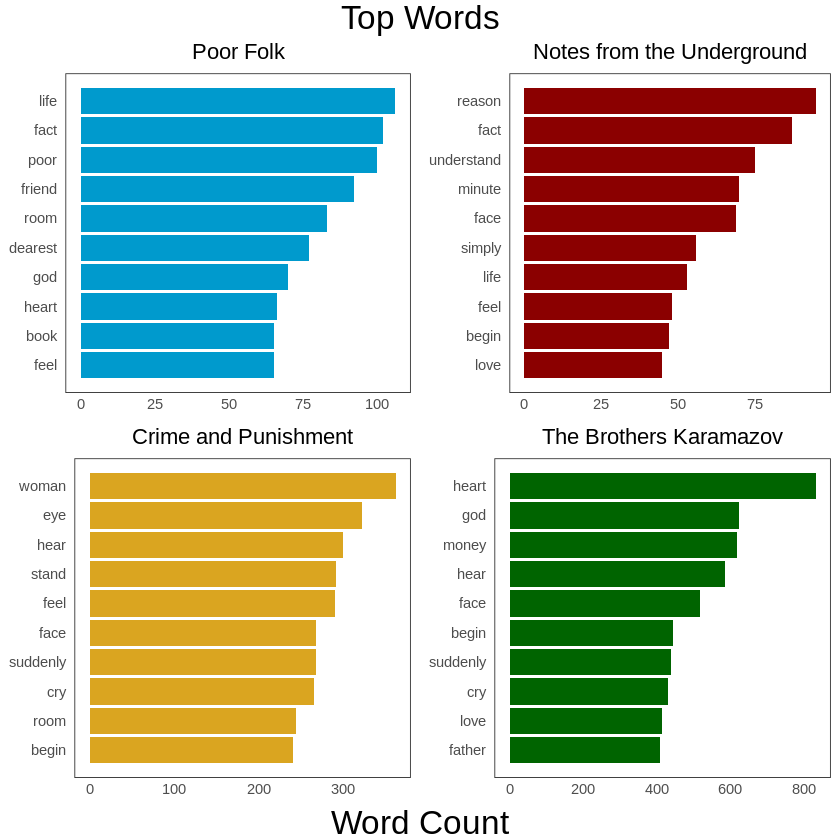

In [86]:
grid.arrange(
  dostoevsky_wordcount$`Poor Folk`, 
  dostoevsky_wordcount$`Notes from the Underground`, 
  dostoevsky_wordcount$`Crime and Punishment`, 
  dostoevsky_wordcount$`The Brothers Karamazov`,
  nrow = 2, ncol = 2, 
  top = textGrob("Top Words",gp=gpar(fontsize=20)), 
  bottom = textGrob("Word Count",gp=gpar(fontsize=20)))

### VI- Topics per Part (TF-IDF)

Next, I use tidytext's `bind_tf_idf` to calculate the TF-IDF value. TF-IDF highlights words that appear frequently in a particular document, but doesn't appear a lot throughout the entire corpus, the assumption here is that this word is relevant to this document. I apply the `bind_tf_idf` on the 'part' level, and not on the entire level. In other words, I'm trying to identify the most salient words per part, and not per the entire novel.

In [ ]:
# 6. topics per part - TF-IDF
dostoevsky_tfidf <- dostoevsky_Words %>%
  distinct() %>%
  mutate(title_part=paste(title,part,sep='_')) %>% 
  select(title_part, lemma) %>%
  count(title_part, lemma, sort = TRUE) %>% 
  bind_tf_idf(lemma, title_part, n) %>%
  mutate(title=unlist(lapply(strsplit(title_part,"_"), `[[`, 1)),
         part=unlist(lapply(strsplit(title_part,"_"), `[[`, 2))) %>%
  group_by(title, part) %>%
  mutate(word=lemma,row=row_number()) %>% 
  select(-title_part, -lemma)

In [ ]:
dostoevsky_top_tfidf <- dostoevsky_tfidf %>%
  arrange(desc(tf_idf)) %>%
  mutate(word = factor(word, levels = rev(unique(word)))) %>%
  group_by(title,part) %>% 
  slice(seq_len(3)) %>%
  ungroup() %>%
  arrange(part, tf_idf) %>%
  group_by(title) %>%
  mutate(row=row_number())

In [ ]:
# topic part plot
topic_part <- list()
for (title in unique(dostoevsky_top_tfidf$title)){
  topic_part[[title]] <- ggplot(dostoevsky_top_tfidf[dostoevsky_top_tfidf$title==title,]) +
    aes(x=row, y=tf_idf) +
    geom_col(fill=my_colors[title], show.legend = NULL) +
    labs(x = NULL, y = NULL) +
    theme_dostoevsky() +  
    facet_wrap(~as.integer(part),scales = "free") +
    scale_x_continuous(  # This handles replacement of row 
      breaks = dostoevsky_top_tfidf[dostoevsky_top_tfidf$title==title,]$row, # notice need to reuse data frame
      labels = dostoevsky_top_tfidf[dostoevsky_top_tfidf$title==title,]$word) +
    coord_flip()
}

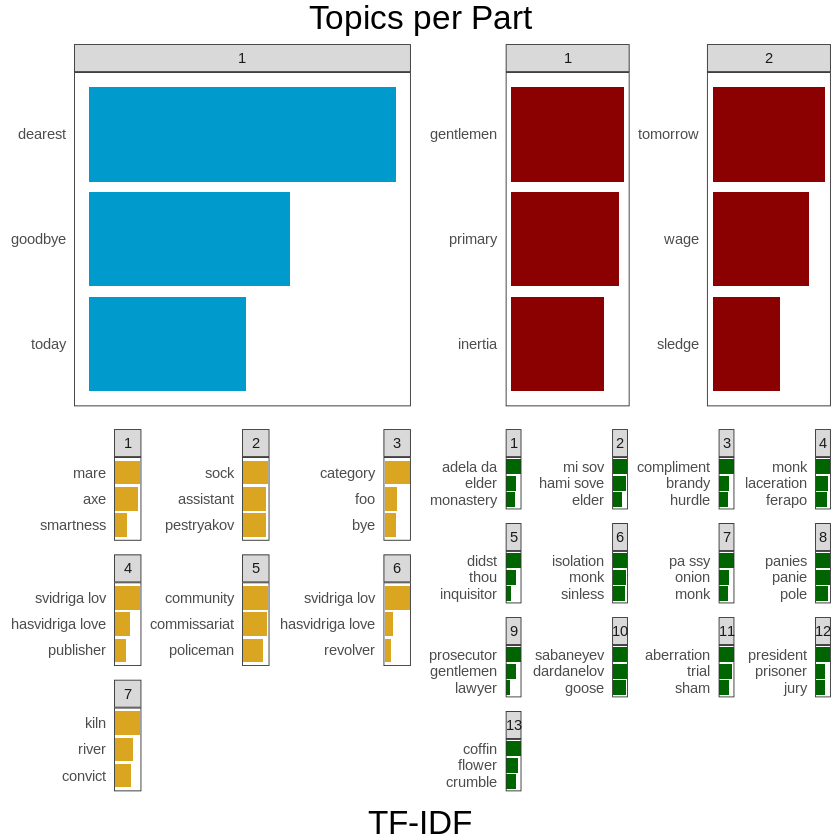

In [87]:
grid.arrange(
  topic_part$`Poor Folk`, 
  topic_part$`Notes from the Underground`, 
  topic_part$`Crime and Punishment`, 
  topic_part$`The Brothers Karamazov`,
  nrow = 2, ncol = 2, 
  top = textGrob("Topics per Part",gp=gpar(fontsize=20)), 
  bottom = textGrob("TF-IDF",gp=gpar(fontsize=20)))

### VII- Topic Modelling (LDA)

Another method to identify salient words is LDA. However, it is important to make the distinction here between TF-IDF and LDA. The salient words in LDA are part of a "topic", and not a part of a document like in TF-IDF. Essentially, LDA is an unsupervised model that takes as input a document-term matrix (where each row is a document, and each column is a word), and a parameter k (number of topics to be identified from the DTM). LDA's output will be the most important words per topic. We can also identify the topic constitution of each document. I used the package topicmodels, specifically `theLDA` function, to build the model. The parameters I set were: k (number of topics)=4, method=GIBBS. The below figure shows the most important words per topic according to our LDA model:

In [88]:
# 6. Topic analysis
# plotting utilities (color scheme and theme)
# Document term Matrix
dostoevsky_dtm_balanced <- dostoevsky_Words %>%
  count(title, lemma, sort = TRUE) %>%
  ungroup() %>%
  cast_dtm(title, lemma, n)

In [95]:
seed <- 823
num_words <- 15
k <- 4

lda_dostoevsky <- LDA(dostoevsky_dtm_balanced, k = 4, method = "GIBBS", control = list(seed = seed))

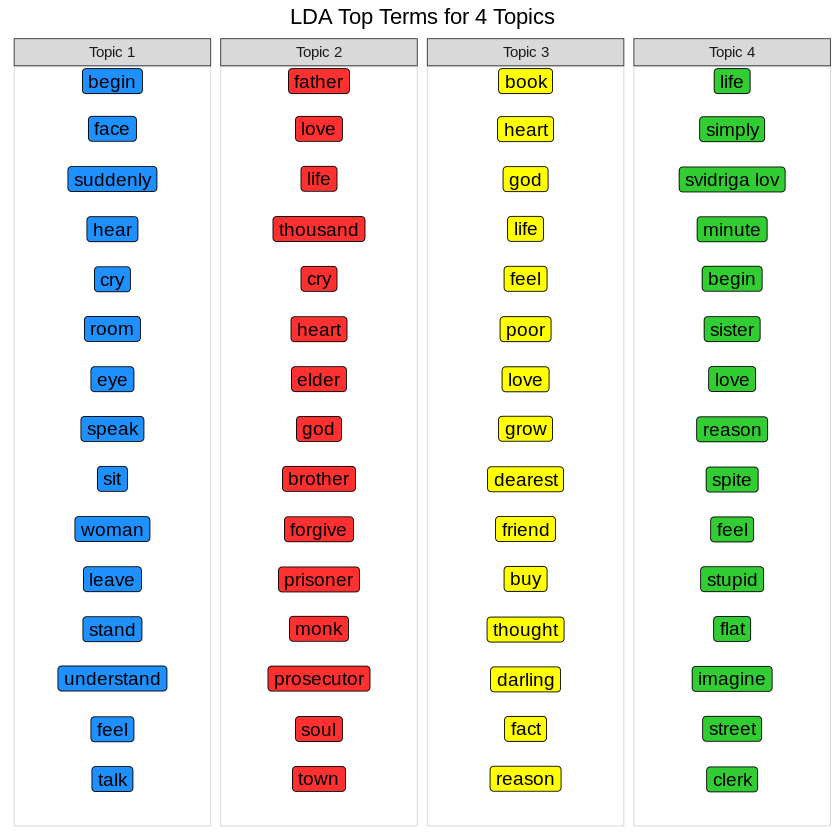

In [96]:
top_terms_per_topic <- function(lda_model, num_words) {
  
  #tidy LDA object to get word, topic, and probability (beta)
  topics_tidy <- tidy(lda_model, matrix = "beta")
  
  top_terms <- topics_tidy %>%
    group_by(topic) %>%
    arrange(topic, desc(beta)) %>%
    #get the top num_words PER topic
    slice(seq_len(num_words)) %>%
    arrange(topic, beta) %>%
    #row is required for the word_chart() function
    mutate(row = row_number()) %>%
    ungroup() %>%
    #add the word Topic to the topic labels
    mutate(topic = paste("Topic", topic, sep = " "))
  #create a title to pass to word_chart
  title <- paste("LDA Top Terms for", k, "Topics")
  #call the word_chart function you built in prep work
  word_chart(top_terms, top_terms$term, title)
}

top_terms_per_topic(lda_dostoevsky, num_words)

In [97]:
title_topic_relationship <- tidy(lda_dostoevsky, matrix='gamma') %>%
  inner_join(dostoevsky_Words, by = c("document"="title")) %>%
  select(document, topic, gamma) %>%
  group_by(document, topic) %>%
  mutate(mean = mean(gamma)) %>%
  select(-gamma) %>%
  distinct()

title_topic_relationship$topic = paste("Topic", title_topic_relationship$topic, sep = " ")  

### VIII- Source-Theme Relationships

Using the LDA model we built in the previous step, I created a chrod-diagram that shows the makeup of each document (novel) in terms of topics. The chord-diagram was created using the circlize package, and the `chordDiagram` function:

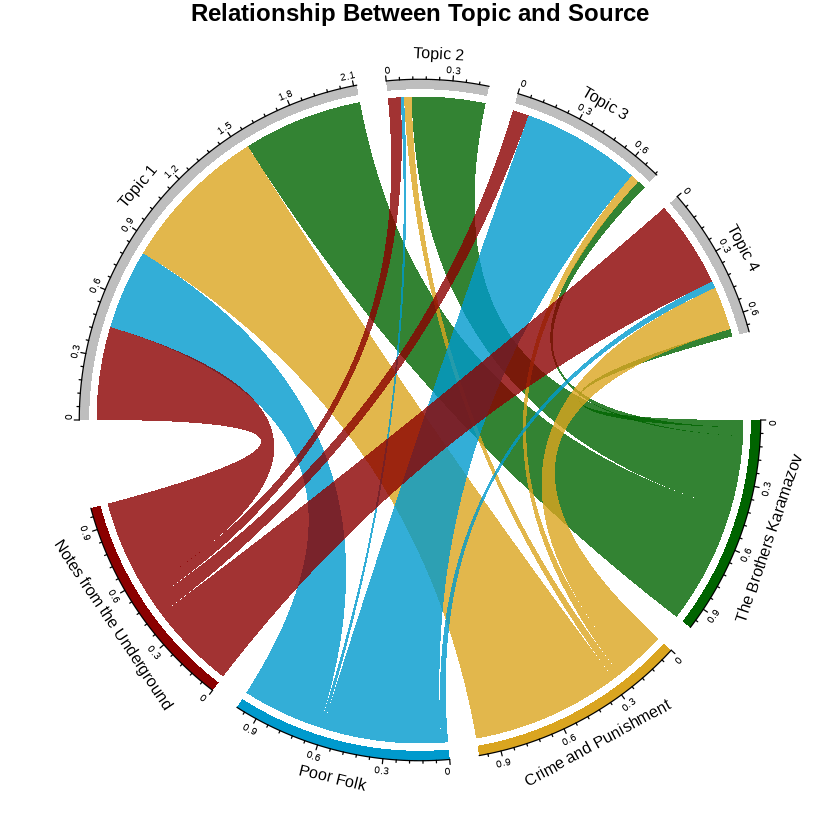

In [98]:
circos.clear() #very important! Reset the circular layout parameters
#assign colors to the outside bars around the circle
grid.col = c('Poor Folk' = my_colors[['Poor Folk']],
             "Notes from the Underground" = my_colors[['Notes from the Underground']],
             "Crime and Punishment" = my_colors[['Crime and Punishment']],
             "The Brothers Karamazov" = my_colors[['The Brothers Karamazov']],
             "Topic 1" = "grey", "Topic 2" = "grey", "Topic 3" = "grey", "Topic 4" = "grey")

circos.par(gap.after = c(rep(5, length(unique(title_topic_relationship[[1]])) - 1), 15,
                         rep(5, length(unique(title_topic_relationship[[2]])) - 1), 15))
#main function that draws the diagram. transparancy goes from 0-1
chordDiagram(title_topic_relationship, grid.col = grid.col, transparency = .2)
title("Relationship Between Topic and Source")

### IX- Word Networks

#### A- Story Connections

Next, I look at connections between the novels, using a network graph diagram. Here, I've selected the top words per topic per novel, and connected the words that appeared in common:

In [99]:
# Word Network
dostoevsky_Maps <- dostoevsky_Words[,c('title','lemma')] %>% 
  count(title, lemma, sort=TRUE) %>% 
  group_by(title) %>% 
  summarise(lemma,
            wordcount=n,
            totalcount=sum(n),
            wordpercent=wordcount/totalcount*100) %>% 
  select(title, lemma, wordpercent) %>%
  rename(n=wordpercent) %>%
  slice(seq_len(20)) 

`summarise()` has grouped output by 'title'. You can override using the `.groups` argument.



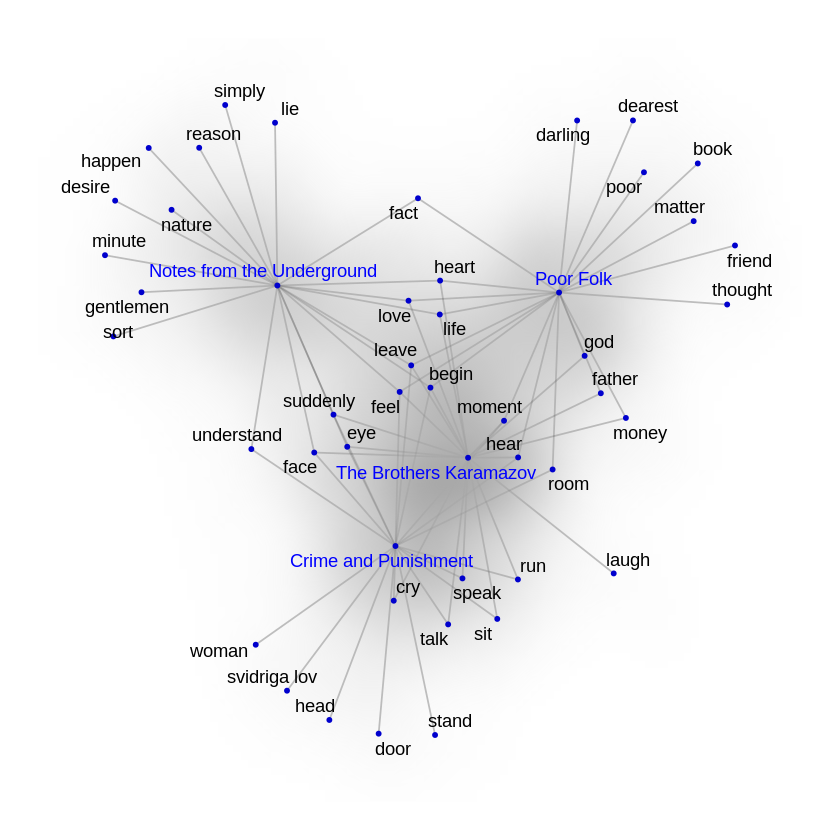

In [100]:
maps_graph <- dostoevsky_Maps %>%
  graph_from_data_frame() %>%
  ggraph(layout = "fr")

mcolor <- maps_graph$data %>% mutate(mcolor = if_else(name%in%unique(dostoevsky_Maps$title), "blue", "black")) %>% select(mcolor)

maps_graph +
  ggraph::geom_edge_link(alpha = .25) +
  ggraph::geom_edge_density(aes(fill = n)) +
  ggraph::geom_node_point(color = "blue3", size = 1) + #Purple for Prince!
  ggraph::geom_node_text(aes(label = name),  repel = TRUE, color=mcolor$mcolor) +
  theme_void() + theme(legend.position = "none",
                       plot.title = element_text(hjust = 0.5))

#### B- Bigrams

This next graph plot shows which words appear together. First, I had to create a bigram matrix, which I then used to draw this graph. For both this plot and the previous one I used the packages igraph & ggraph, and the functions graph_from_data_frame() and ggraph(). Another important factor here is that I speicifed a handful of words to see their networks. I chose to do this to examine if there are any relationships between some of the recurrent themes in Dostoevsky's novels.

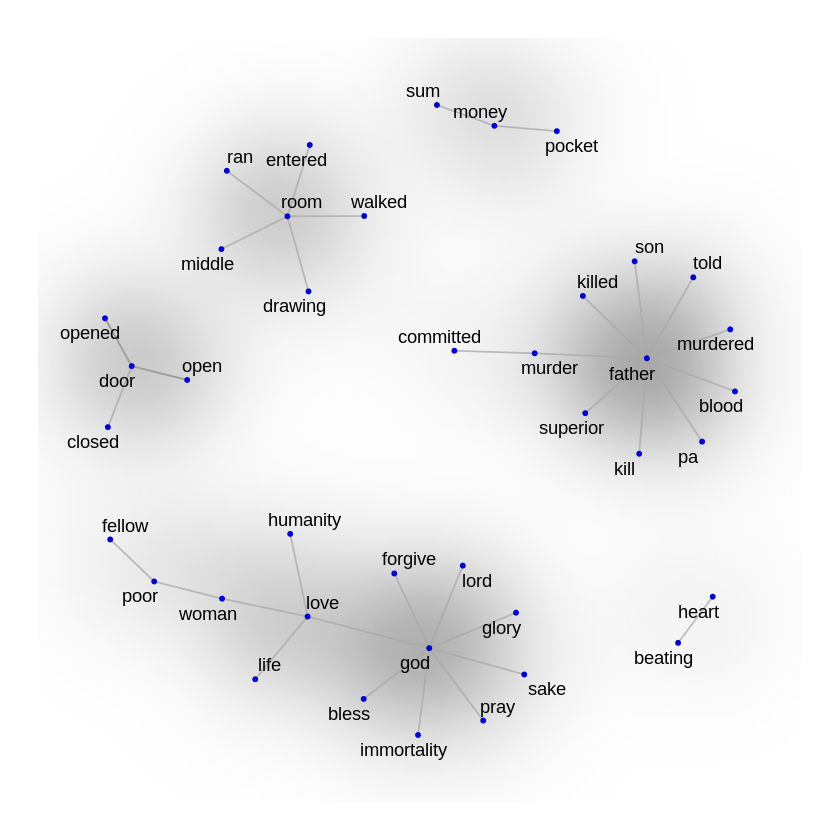

In [101]:
# 9. networks
desired.words <- c('father','god','room','poor','murder','love','door','money','heart')

desired_bigrams <- dostoevsky_bigrams[dostoevsky_bigrams$word1 %in% desired.words | dostoevsky_bigrams$word2 %in% desired.words,] %>%
  count(word1, word2, sort = TRUE) %>%
  slice(seq_len(40)) 

bigram_graph <- desired_bigrams %>% graph_from_data_frame() #From `igraph`

set.seed(823)

a <- grid::arrow(type = "closed", length = unit(.15, "inches"))

ggraph(bigram_graph, layout = "fr") +
  geom_edge_link(alpha = .25) +
  geom_edge_density(aes(fill = n)) +
  geom_node_point(color = "blue3", size = 1) + #Purple for Prince!
  geom_node_text(aes(label = name),  repel = TRUE) +
  theme_void() + theme(legend.position = "none",
                       plot.title = element_text(hjust = 0.5))

### X- Plot Analysis (Syuzhet)

#### A- Sample

Here, I plot the story arc using the syuzhet package. The first step is to get the sentiment values for every sentence. This is achieved using the `get_sentiment`, which takes as input a text vector and a lexicon (optional, default set to 'syuzhet'). Next, we pass these sentiment values to the `get_dct_transform` function to smoothen them out, otherwise the sentiments will cancel each other as show in the top figure in the below plot. Another important feature of the `get_dct_transform` function is the lps parameter, which determines the number of components to be retained (the lower the value, the smoother the curve).

In [107]:
# Plot analysis
seq <- c(dostoevsky_DCTPart[dostoevsky_DCTPart$title=='Crime and Punishment' & dostoevsky_DCTPart$part==1,] %>%
           group_by(chapter) %>%
           summarise(index=min(doc_id)) %>%
           ungroup() %>%
           select(index))$index

In [108]:
rescale <- function(x){
  2 * (x - min(x))/( max(x) - min(x)) -1
}

In [109]:
raw_values <- dostoevsky_DCTPart$sentiment
lps <- 10
window <- 0.1
wdw <- round(length(raw_values) * window)
rolled <- rescale(zoo::rollmean(raw_values, k = wdw, fill = 0))
half <- round(wdw/2)
rolled[1:half] <- NA
end <- length(rolled) - half
rolled[end:length(rolled)] <- NA
trans <- get_dct_transform(raw_values, low_pass_size = lps, x_reverse_len = length(raw_values), scale_range = T)
x <- 1:length(raw_values)
y <- raw_values
raw_lo <- stats::loess(y ~ x, span = 0.5)
low_line <- rescale(stats::predict(raw_lo))
normed_trans <- get_dct_transform(raw_values, x_reverse_len = length(raw_values), scale_range = T, low_pass_size = 5)
cap_part <- data.frame(n=seq(1:length(low_line)), low_line, rolled, trans, normed_trans)

In [110]:
sentiment_raw <- ggplot(dostoevsky_DCTPart) +
  aes(x=doc_id, y=sentiment) +
  geom_line(color='goldenrod', size=1) +
  geom_hline(yintercept = 0, lty=2, alpha=0.3) +
  geom_vline(xintercept = seq, lty=2, alpha=0.3) +
  theme_dostoevsky() +
  labs(x=NULL, y=NULL, title='Sentiment (raw values)') +
  theme(axis.text.x = element_text()) +
  scale_x_continuous(
    breaks=seq, 
    labels=seq(1:length(seq)))

In [111]:
sentiment_rolled <- cap_part %>% 
  select(-normed_trans) %>%
  gather(key='n', value='line_type') %>% 
  group_by(n) %>% 
  summarise(row_num = row_number(), 
            line_type) %>%
  ungroup() %>%
  ggplot() +
  aes(x=row_num, y=line_type, color=n) +
  geom_line() +
  geom_hline(yintercept = 0, lty=2, alpha=0.3) +
  geom_vline(xintercept = seq, lty=2, alpha=0.3) +
  theme_dostoevsky() +
  labs(x=NULL, y=NULL, title='Sentiment (normalized values)') +
  theme(axis.text.x = element_text(),
        legend.position = c(1, 1),
        legend.justification = c("right", "top"),
        legend.box.just = "right",
        legend.margin = margin(6, 6, 6, 6),
        legend.box.background = element_rect(),
        legend.box.margin = margin(6, 6, 6, 6)) +
  scale_x_continuous(
    breaks=seq, 
    labels=seq(1:length(seq))) +
  scale_color_manual(values = c('black', 'grey60', 'goldenrod'), name='Line Type', 
                     labels = c("Loess Smooth", "Rolling Mean", "Syuzhet DCT (lps = 10)"))

`summarise()` has grouped output by 'n'. You can override using the `.groups` argument.



In [112]:
sentiment_normal <- ggplot(cap_part) +
  aes(x=n, y=normed_trans, color='goldenrod') +
  geom_line(size=1) +
  geom_hline(yintercept = 0, lty=2, alpha=0.3) +
  geom_vline(xintercept = seq, lty=2, alpha=0.3) +
  theme_dostoevsky() +
  labs(x=NULL, y=NULL, title='Sentiment (normalized values)') +
  theme(axis.text.x = element_text(),
        legend.position = c(1, 1),
        legend.justification = c("right", "top"),
        legend.box.just = "right",
        legend.margin = margin(6, 6, 6, 6),
        legend.box.background = element_rect(),
        legend.box.margin = margin(6, 6, 6, 6)) +
  scale_x_continuous(
    breaks=seq,
    labels=seq(1:length(seq))) +
  scale_color_manual(values = 'goldenrod', name='Line Type',
                     labels = "Syuzhet DCT (lps = 5)") +
  ggplot2::annotate("segment", x=65, xend = 65, y=-0.75, yend = -0.27, arrow=arrow()) +
  geom_text(x=65, y=-0.8, label='a young man living in poor conditions', color='gray45', size=3, alpha=4, show.legend = FALSE) +
  ggplot2::annotate("segment", x=170, xend = 170, y=0.27, yend = -0.16, arrow=arrow()) +
  geom_text(x=170, y=0.3, label='meets a drunkard', color='gray45', size=3, alpha=4, show.legend = FALSE) + 
  ggplot2::annotate("segment", x=570, xend = 570, y=0.27, yend = 0.78, arrow=arrow()) +
  geom_text(x=570, y=0.2, label='a letter from his mother', color='gray45', size=3, alpha=4, show.legend = FALSE) +
  ggplot2::annotate("segment", x=750, xend = 750, y=-0.15, yend = 0.95, arrow=arrow()) +
  geom_text(x=750, y=-0.18, label='rescues a litte girl', color='gray45', size=3, alpha=4, show.legend = FALSE) +
  ggplot2::annotate("segment", x=1150, xend = 1150, y=0.3, yend = -0.55, arrow=arrow()) +
  geom_text(x=1150, y=0.32, label='nightmare of the old mare', color='gray45', size=3, alpha=4, show.legend = FALSE) +
  ggplot2::annotate("segment", x=1320, xend = 1320, y=0.6, yend = -0.96, arrow=arrow()) +
  geom_text(x=1320, y=0.62, label='a vision and a fateful coincidence', color='gray45', size=3, alpha=4, show.legend = FALSE) +
  ggplot2::annotate("segment", x=1550, xend = 1550, y=0, yend = -0.78, arrow=arrow()) +
  geom_text(x=1550, y=0.05, label='committing the crime', color='gray45', size=3, alpha=4, show.legend = FALSE)

Warning message:
“Removed 167 row(s) containing missing values (geom_path).”


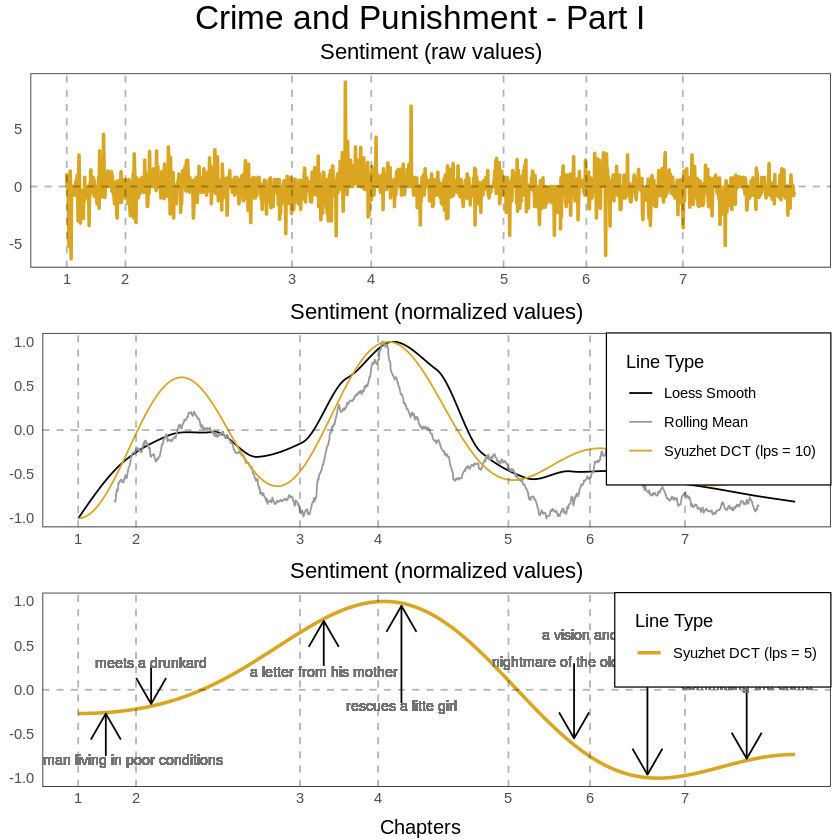

In [113]:
grid.arrange(
  sentiment_raw, 
  sentiment_rolled, 
  sentiment_normal,
  nrow = 3, ncol = 1, 
  top = textGrob("Crime and Punishment - Part I",gp=gpar(fontsize=20)),
  bottom = 'Chapters')

#### B- Story Arcs

The plots for all 4 novels:

In [114]:
# dct transform plot
plot_syuzhet <- list()
for (title in unique(dostoevsky_DCT$title)){
  seq <- c(dostoevsky_DCT[dostoevsky_DCT$title==title,] %>%
             group_by(part) %>%
             summarise(index=min(n)) %>%
             ungroup() %>%
             select(index))$index
  
  plot_syuzhet[[title]] <- ggplot(dostoevsky_DCT[dostoevsky_DCT$title==title,]) +
    aes(x=n, y=dct_values) +
    geom_bar(stat = "identity", alpha = 0.8, color = my_colors[title], fill = my_colors[title]) +
    geom_bar(stat = "identity", alpha = 0.8, color = my_colors[title], fill = my_colors[title]) +
    geom_hline(yintercept = 0, lty=2) +
    geom_vline(xintercept = seq, lty=2, alpha=0.5) +
    labs(x=NULL, y=NULL, title=title) +
    theme_dostoevsky() +
    theme(axis.text.x = element_text(), axis.text.y = element_blank()) +
    scale_x_continuous(
      breaks=seq,
      labels=dostoevsky_DCT[dostoevsky_DCT$title==title & dostoevsky_DCT$n %in% seq,'part'])
}

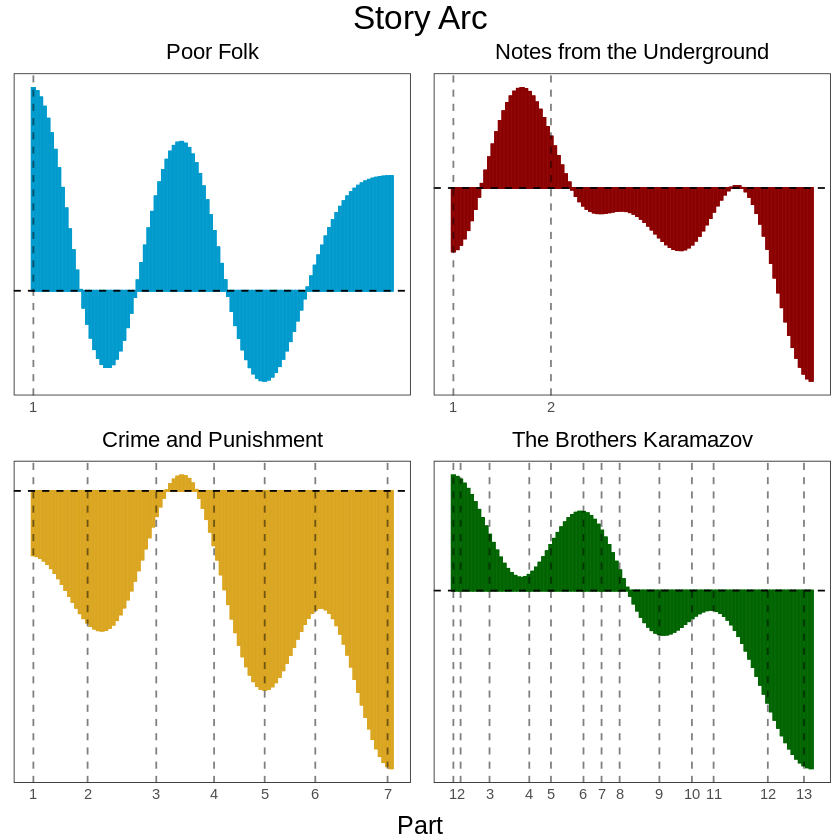

In [115]:
grid.arrange(
  plot_syuzhet$`Poor Folk`, 
  plot_syuzhet$`Notes from the Underground`, 
  plot_syuzhet$`Crime and Punishment`, 
  plot_syuzhet$`The Brothers Karamazov`,
  nrow = 2, ncol = 2, 
  top = textGrob("Story Arc",gp=gpar(fontsize=20)),
  bottom = textGrob("Part",gp=gpar(fontsize=15))
)

### XI- Character Arc

To plot these arcs, I extracted all the sentences that had the character's name (including the sentences that mentioned the name in a diminutive form). Then I went through the same steps as before, that is, I retreived the sentiment values, then applied the transformation function get_dct_transfrom() on them, and finally, plotted the output:

In [116]:
# 10. Character Arc
raskolnikov <- dostoevsky_M[dostoevsky_M$title=='Crime and Punishment' & 
                              (grepl('rodion', tolower(dostoevsky_M$text)) |
                                 grepl('raskolnikov', tolower(dostoevsky_M$text)) |
                                 grepl('rodya', tolower(dostoevsky_M$text))),]

In [117]:
sonia <- dostoevsky_M[dostoevsky_M$title=='Crime and Punishment' & 
                        (grepl('sofya', tolower(dostoevsky_M$text)) |
                           grepl('sonia', tolower(dostoevsky_M$text))),]

In [118]:
svidrigailov <- dostoevsky_M[dostoevsky_M$title=='Crime and Punishment' & 
                               (grepl('svidrigailov', tolower(dostoevsky_M$text)) |
                                  grepl('arkady', tolower(dostoevsky_M$text))),]

In [119]:
dct_values_raskolnikov <- get_dct_transform(
  raskolnikov$sentiment,
  low_pass_size = 5,
  x_reverse_len = 100,
  scale_vals = T,
  scale_range = F
)

In [120]:
dct_values_sonia <- get_dct_transform(
  sonia$sentiment,
  low_pass_size = 5,
  x_reverse_len = 100,
  scale_vals = T,
  scale_range = F
)

In [121]:
dct_values_svidrigailov <- get_dct_transform(
  svidrigailov$sentiment,
  low_pass_size = 5,
  x_reverse_len = 100,
  scale_vals = T,
  scale_range = F
)

In [122]:
character_dct <- data.frame(
  dct_values_raskolnikov=dct_values_raskolnikov,
  dct_values_sonia=dct_values_sonia,
  dct_values_svidrigailov=dct_values_svidrigailov,
  row=seq(1:length(dct_values_raskolnikov))
)

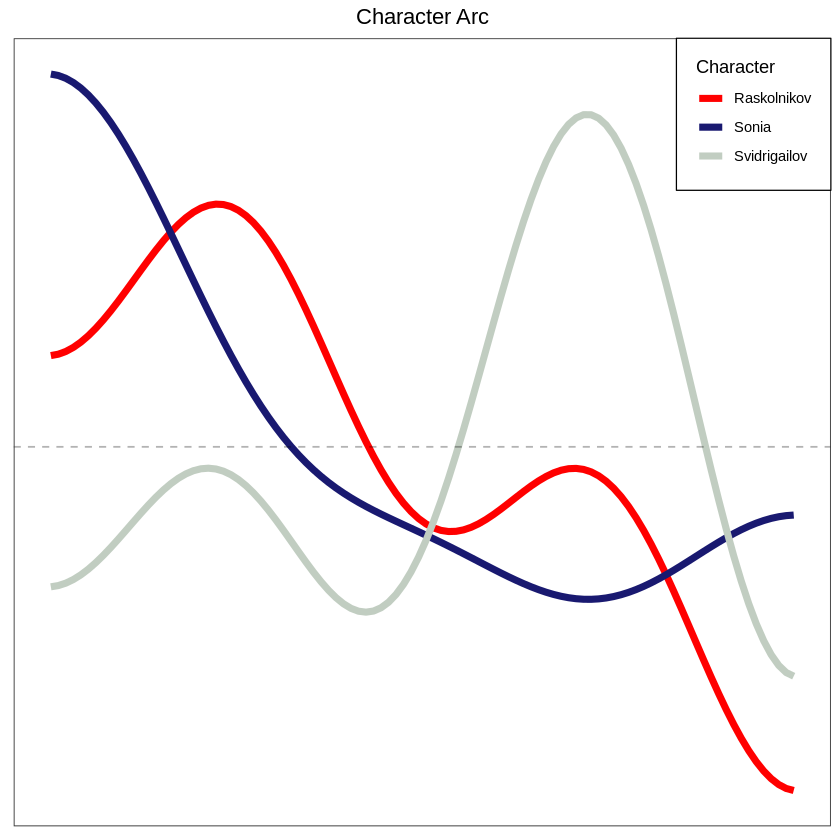

In [123]:
character_dct %>% 
  gather(row, dct_value) %>%
  rename(dct_type = row) %>% 
  group_by(dct_type) %>%
  mutate(row = row_number()) %>%
  ungroup() %>%
  ggplot() +
  aes(x=row, y=dct_value, color=dct_type) +
  geom_line(size=2) +
  geom_hline(yintercept = 0, lty=2, alpha=0.3) +
  theme_dostoevsky() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        legend.position = c(1,1),
        legend.justification = c("right", "top"),
        legend.box.just = "right",
        legend.margin = margin(6, 6, 6, 6),
        legend.box.background = element_rect(),
        legend.box.margin = margin(6, 6, 6, 6)) +
  scale_color_manual(values = c('red',"midnightblue","honeydew3"), name='Character', 
                     labels = c("Raskolnikov", "Sonia", "Svidrigailov")) +
  ggtitle("Character Arc")

### XII- Sentiment Plots

To construct these sentiment plot, I used teh 'NRC' lexicon, which provides valence values for eight emotions (not just a positive/negative value). Another thing I had to do here was handling the different lengths of the novels. To do that, I calculated the rolling mean for each of the emotions usina a rolling window size equal to 10% of the length of the story. Then, I used the `rescale_x_2` function to normalize the length of the story and the rolled mean values to a scale between 0 and 1, in the end all outputs will share the same scale, and can therefore be plotted on the same plot.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



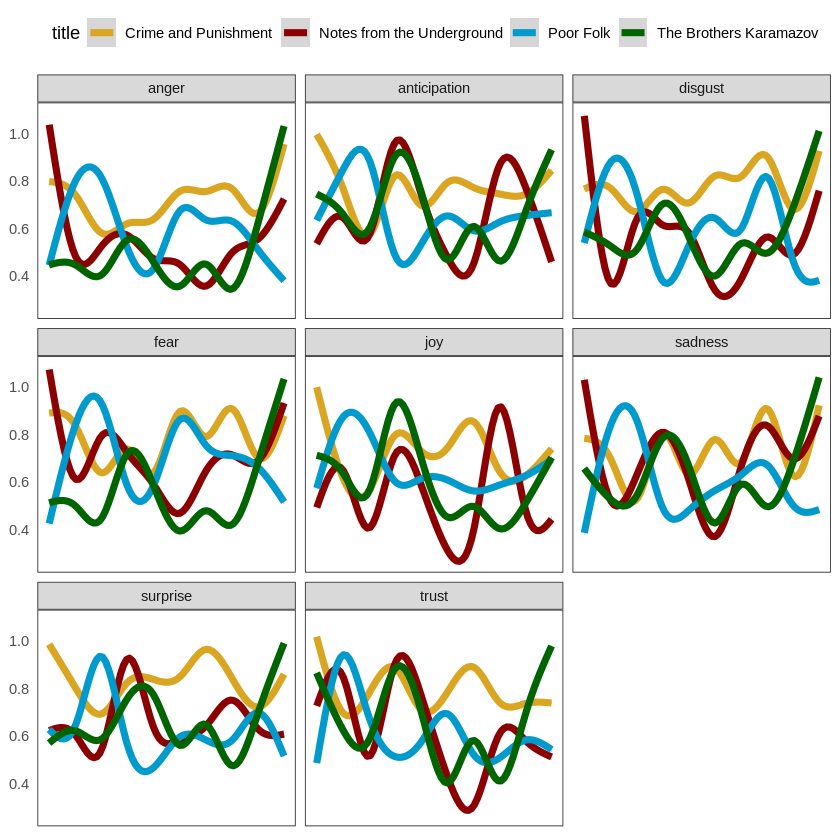

In [124]:
# Sentiment plot
ggplot(dostoevsky_nrc) +
  aes(x=x, y=y, color=title) +
  geom_smooth(size=2) +
  facet_wrap(~sentiment) +
  scale_color_manual(values=my_colors) +
  theme_dostoevsky() +
  theme(legend.position = "top",
        axis.title.x = element_blank(),
        axis.title.y = element_blank())

### XIII- Word-Sentiment Matrix

The last plot was constructed by joining the associated 'NRC' emotions with the most frequent words per novel.

This dataset was published in Saif M. Mohammad and Peter Turney. (2013), ``Crowdsourcing a Word-Emotion Association Lexicon.'' Computational Intelligence, 29(3): 436-465.

article{mohammad13,
author = {Mohammad, Saif M. and Turney, Peter D.},
title = {Crowdsourcing a Word-Emotion Association Lexicon},
journal = {Computational Intelligence},
volume = {29},
number = {3},
pages = {436-465},
doi = {10.1111/j.1467-8640.2012.00460.x},
url = {https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1467-8640.2012.00460.x},
eprint = {https://onlinelibrary.wiley.com/doi/pdf/10.1111/j.1467-8640.2012.00460.x},
year = {2013}

In [172]:
nrc_lexicon <- read.table('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', header = FALSE, sep = "", dec = ".")

In [173]:
colnames(nrc_lexicon) <- c("word","sentiment","level")

In [174]:
# word-sentiment matrix
sentiment_matrix <- list()
for (title in unique(dostoevsky_Words$title)){
  sentiment_matrix[[title]] <- dostoevsky_Words[dostoevsky_Words$title==title,] %>% 
    group_by(lemma) %>% 
    summarise(countx = n()) %>% 
    arrange(desc(countx)) %>% 
    slice(seq_len(80)) %>% 
    rename(word=lemma) %>%
    inner_join(nrc_lexicon) %>% 
    filter(!sentiment %in% c('negative', 'positive')) %>%
    ggplot(aes(x = word, fill = sentiment)) +
    facet_grid(~sentiment) +
    geom_bar() + #Create a bar for each word per sentiment
    theme_dostoevsky() +
    theme(panel.grid.major.x = element_blank(),
          axis.text.x = element_blank()) + #Place the words on the y-axis
    xlab(NULL) + ylab(NULL) +
    ggtitle(title) +
    coord_flip()
}

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"



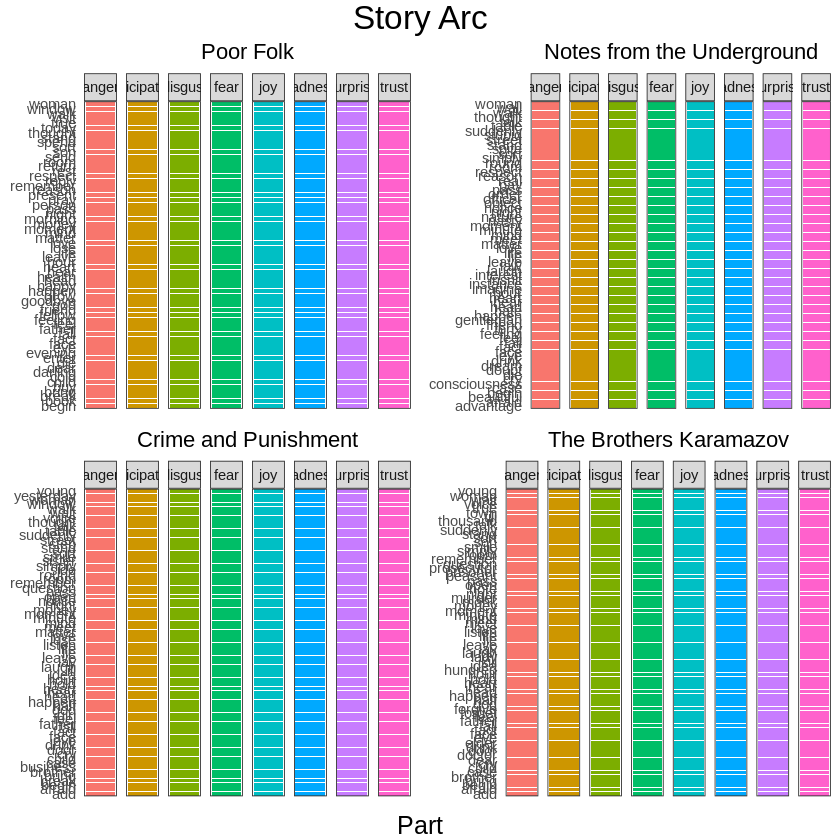

In [175]:
grid.arrange(
  sentiment_matrix$`Poor Folk`,
  sentiment_matrix$`Notes from the Underground`,
  sentiment_matrix$`Crime and Punishment`,
  sentiment_matrix$`The Brothers Karamazov`,
  nrow = 2, ncol = 2, 
  top = textGrob("Story Arc",gp=gpar(fontsize=20)),
  bottom = textGrob("Part",gp=gpar(fontsize=15))
)

## Conclusion

The different plots pass the eye test in terms of identifying the main topics of each of the novels. For example, the word cloud and the word frequency bar chart for 'Poor Folk' identify the word "dearest" as one of the top 10 words in the text, which is logical given how the novel is constructed as a series of correspondences between the two relatives, and the vast majority of these letters start with the word as they address each other. Things get more interesting when we introduce TF-IDF, for example, in Crime and Punishment part 1, the words with the highest TF-IDF scores are "mare" and "axe", the first alludes to the nightmare the protagonist has in chapter 5, which is in itself an allusion to the crime he is about to commit; the second ("axe") refers to the weapon of choice. The LDA model provides an even more holistic view of the topics discussed in each of the novels. Take "The Brothers Karamazov", it is mostly associated with topic 3 and topic 1; topic 3 is made up of words like "father", "love", "cry" and "god", all words relevant to the novel, on the other hand topic 1 is made up of words like "begin", "room", "suddenly", "woman", which are also relevant to the story. These connections are illustrated in the chord diagram and the first network graph.

When it comes to the plot lines, the plots show an evolution over time. In his first published work, the arc of the story is positive for the most part, however this changes in the other three stories, where the arc is mostly on the negative side. It is worth noting here that that these three stories were written after the author's exile. Another important aspect of Dostoevsky's plot shapes is the cascading property, as we can see in the plots of "Crime and Punishment" and "The Brothers Karamazov". The story arc is taking a negative turn, but the emotions fluctuate through the story, reflecting the characters' feelings through different events.

Finally, with regard to the sentiment expression in the novels, what we can see is that "Crime and Punishment" is the most emotive of the four novels, as illustrated in the grid sentiment plots, whereas the lines of the other novels fluctuate between high and low emotive states.

## References

[1] Acerbi A, Lampos V, Garnett P, Bentley RA (2013) The Expression of Emotions in 20th Century Books. PLoS ONE 8(3): e59030. doi:10.1371/journal.pone.0059030 https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0059030&type=printable  
[2] Bollen J, Mao H, Zeng X-J (2011) Twitter mood predicts the stock market.Journal of Computational Science 2: 1–8. https://www.sciencedirect.com/science/article/abs/pii/S187775031100007X  
[3] Titlow, John Paul (2017) “This new AI-composed pop song sounds like something from a Spotify playlist”. FactCompany https://www.fastcompany.com/40455600/this-new-ai-composed-pop-song-sounds-like-something-from-a-spotify-playlist  
[4] Brooke Bottoni, Yasmine Moolenaar, Anthony Hevia, Thomas Anchor, Kyle Benko, Rainer Knauf, Klaus Jantke, Avelino Gonzalez, Annie Wu (2020) Character Depth and Sentence Diversification in Automated Narrative Generation http://www.cs.ucf.edu/~ecl/papers/2005.flairs.gonzalez.pdf  
[5] Abhishek Bhowmick, Udbhav Prasad, Satwik Kottur. Movie Recommendation based on CollaborativeTopic Modeling https://satwikkottur.github.io/reports/F14-ML-Report.pdf  
[6] https://www.gutenberg.org/  
[7] https://ropensci.org/tutorials/gutenbergr_tutorial/  
[8] https://en.wikipedia.org/wiki/Poor_Folk  
[9] https://en.wikipedia.org/wiki/Notes_from_Underground  
[10] https://en.wikipedia.org/wiki/Crime_and_Punishment  
[11] https://en.wikipedia.org/wiki/The_Brothers_Karamazov  
[12] Jockers, M. Revealing Sentiment and Plot Arcs with the Syuzhet Package - Blog post. www.matthewjockers.net/2015/02/02/syuzhet/  
[13] https://github.com/mjockers/syuzhet  
[14] https://youtu.be/1ZFkhmSTqZI  